# Concept drift detection example using fashion MNIST dataset

Using (fashion mnist)[https://github.com/zalandoresearch/fashion-mnist] dataset to explore concept drift detection algorithms in an image classification domain. The dataset contains 70 000 examples with 60 000 training examples and 10 000 test examples. Each example is a 28x28 greyscale image, and is associated with one of 10 classes: t-shit/top, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankle boot. 

In order to simulate a 'simple' concept drift example, the dataset is modified such that the model classifies according to larger categories, shoes and clothing, where the original classes are subsets of the labels. The model is trained on a concept where shoes consists of Sneaker and Ankle boot. It is then tested and introduced to Sandal as a new concept resulting in a concept drift. 

In [ ]:
# import libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import keras_tuner
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%aimport process_data_copy1
from process_data_copy1 import Data

The data processing steps are handled by the Data class, which gets the dataset, removes a class, splits the datasets, preprocesses the new labels, generates a simulation set with concept drift, and laslty preprocesses the images for use with a CNN model. 

In [2]:
#from process_data import Data


data = Data()

print(data.all_data_images.shape)

(70000, 28, 28)


(70000, 28, 28)


<Figure size 640x480 with 0 Axes>

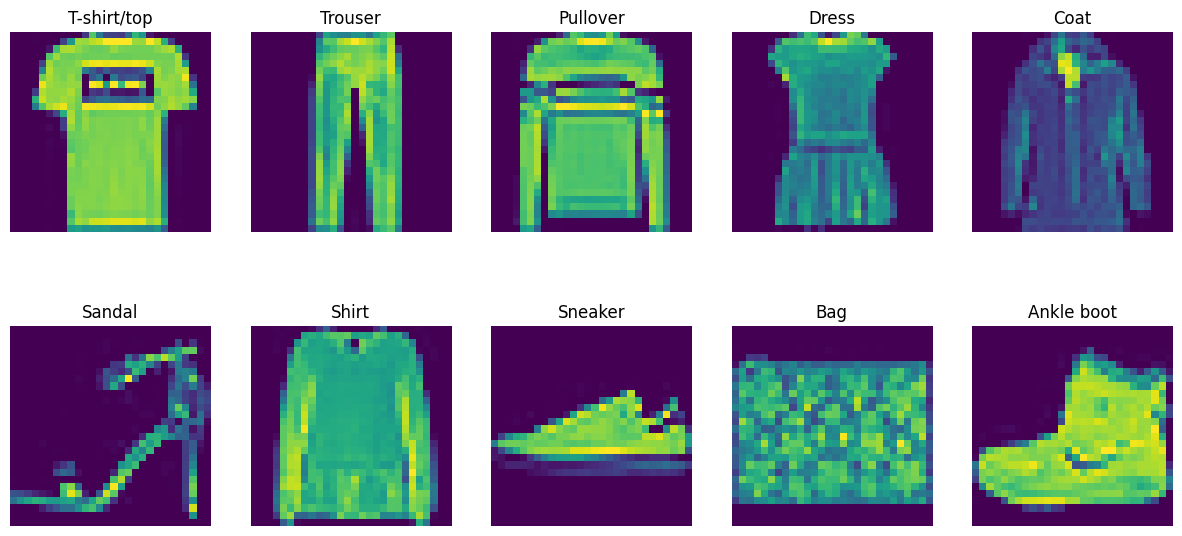

In [3]:
# show unaltered data 
import matplotlib.pyplot as plt
import numpy as np
plt.figure()

rows = 2
cols = 5
print(data.all_data_images.shape)
fig = plt.figure(figsize=(15, 7))

for i in range(10):
    fig.add_subplot(rows, cols, i+1) 
  
    label = np.where(data.all_data_labels == i)[0][0]

    plt.imshow(data.all_data_images[label])
    plt.title(data.original_labels_name[i])  # Set subplot title
    plt.axis('off')

plt.axis('off')
plt.savefig('preview_dataset.png')

In [4]:
data.remove_class_from_training_data(5)
print(data.all_data_images.shape)
print(data.removed_images.shape, data.removed_labels)

(63000, 28, 28)
(7000, 28, 28) [5 5 5 ... 5 5 5]


In [5]:
data.simulation_split(0.3) # set simulation split to 30% of the dataset. Splits the remaining data into training, validation and test sets. 

In [6]:
print(data.test_images.shape, data.test_labels.shape)
print(data.train_images.shape, data.train_labels.shape)
print(data.simulation_images.shape, data.simulation_labels.shape)
print(data.removed_images.shape, data.removed_labels.shape)

(4410, 28, 28) (4410,)
(35280, 28, 28) (35280,)
(18900, 28, 28) (18900,)
(7000, 28, 28) (7000,)


In [7]:

data.preprocess_class_names()

(7000,)


In [8]:
print('Train set: X=%s, y=%s' % (data.train_images.shape, data.train_labels_super.shape))
print('Test set: X=%s, y=%s' % (data.test_images.shape, data.test_labels_super.shape))
print('Simulation set: X=%s, y=%s' % (data.simulation_images.shape, data.simulation_labels_super.shape))
print('Removed set: X=%s, y=%s' % (data.removed_images.shape, data.removed_labels_super.shape))
print('Validation set: X=%s, y=%s' % (data.val_images.shape, data.val_labels_super.shape))

Train set: X=(35280, 28, 28), y=(35280,)
Test set: X=(4410, 28, 28), y=(4410,)
Simulation set: X=(18900, 28, 28), y=(18900,)
Removed set: X=(7000, 28, 28), y=(7000,)
Validation set: X=(4410, 28, 28), y=(4410,)


<Figure size 640x480 with 0 Axes>

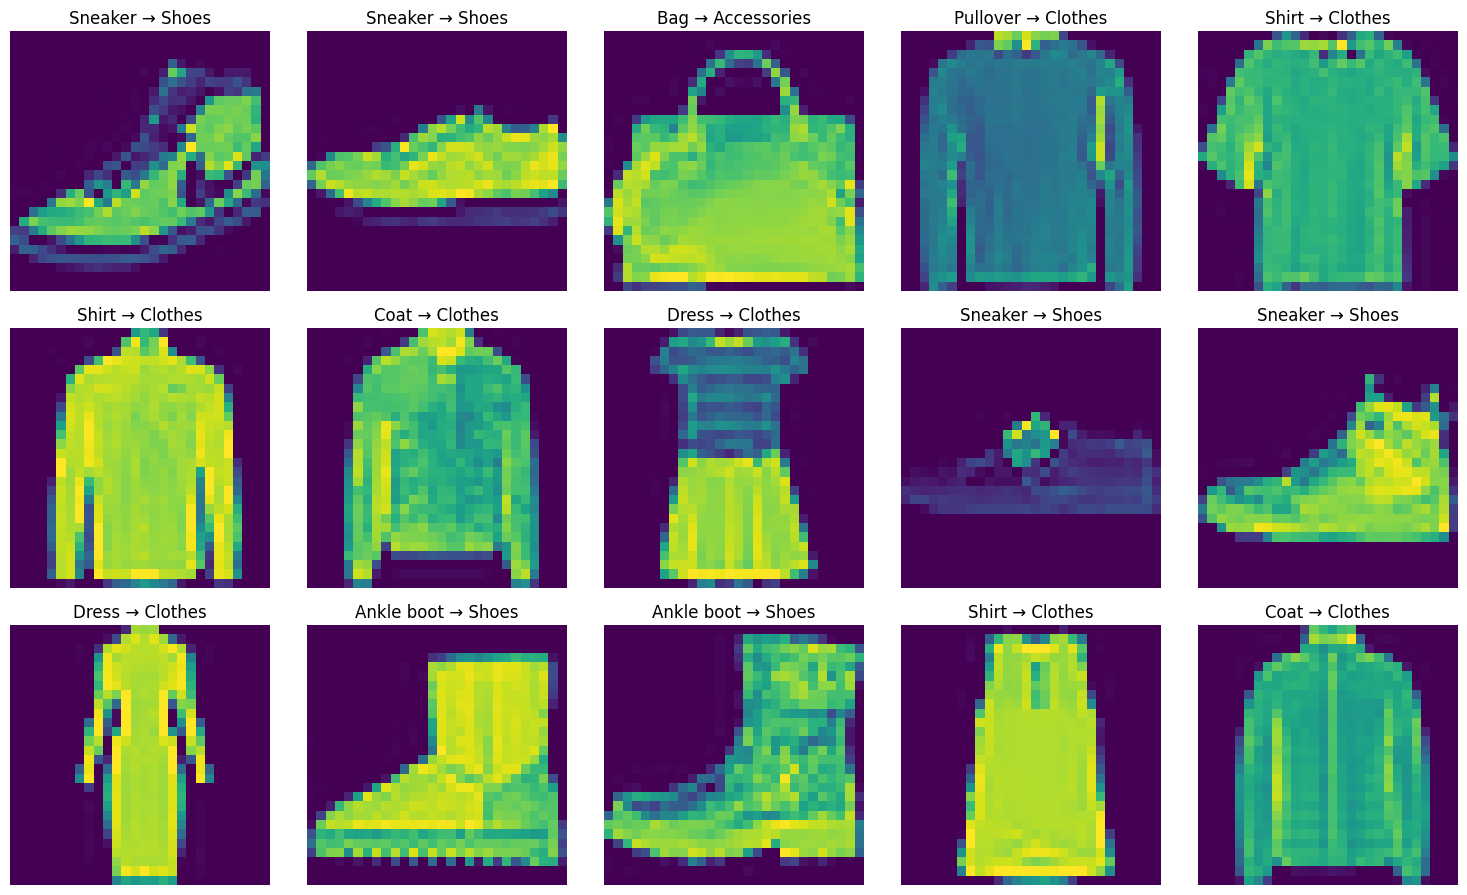

In [9]:
# show unaltered data 
import matplotlib.pyplot as plt
import numpy as np
import random

rows = 5
cols = 5

#print train data with removed class
plt.figure()

fig = plt.figure(figsize=(15, 15))
# k = number of items to select
sample_list = random.choices(range(0,data.train_labels.shape[0]), k=15)
image_count = 1
for i in sample_list:
    fig.add_subplot(rows, cols, image_count) 
    new_label = data.train_labels_super[i]
    old_label = data.train_labels[i]
    plt.imshow(data.train_images[i])
    plt.title(f"{data.original_labels_name[old_label]} → {data.new_class_names[new_label]}")  # Set subplot title
    plt.axis('off')
    image_count += 1

fig.tight_layout()
plt.savefig("Class_mapping_training_data")


In [10]:

data.generate_drift_simulation()

Removed super class is:  1
1648
Insert removed labels to interval 329
Before merge removed images into drift interval 1: (4725, 28, 28) (4725,) (4725,)
after merge removed images into drift interval 1: (5054, 28, 28) (5054,) (5054,)
Before merge removed images into drift interval 2: (4725, 28, 28) (4725,) (4725,)
After merge removed images into drift interval 2: (5384, 28, 28) (5384,) (5384,)
Before merge removed images into drift interval 2: (4725, 28, 28) (4725,) (4725,)
After merge removed images into drift interval 2: (5384, 28, 28) (5384,) (5384,)
Added a total of 1976 from removed class
4725 9779 15163 20876
simulation length after introducing drift:  20876


In [11]:
data.preprocess()

In [12]:
print('Train set: X=%s, y=%s' % (data.train_images.shape, data.train_labels_super.shape))
print('Test set: X=%s, y=%s' % (data.test_images.shape, data.test_labels_super.shape))
print('Simulation set: X=%s, y=%s' % (data.simulation_images.shape, data.simulation_labels_super.shape))
print('Removed set: X=%s, y=%s' % (data.removed_images.shape, data.removed_labels_super.shape))
print('Validation set: X=%s, y=%s' % (data.val_images.shape, data.val_labels_super.shape))


Train set: X=(35280, 28, 28, 1), y=(35280, 3)
Test set: X=(4410, 28, 28, 1), y=(4410, 3)
Simulation set: X=(20876, 28, 28, 1), y=(20876, 3)
Removed set: X=(7000, 28, 28, 1), y=(7000, 3)
Validation set: X=(4410, 28, 28, 1), y=(4410, 3)


<Figure size 640x480 with 0 Axes>

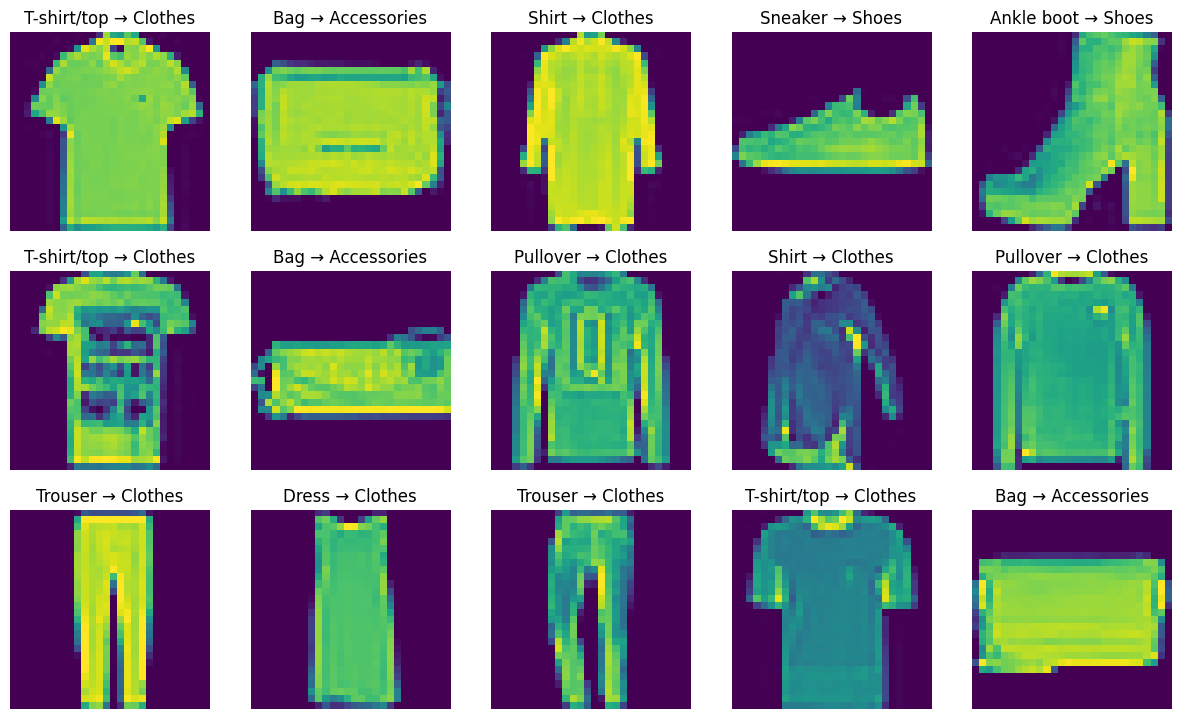

<Figure size 640x480 with 0 Axes>

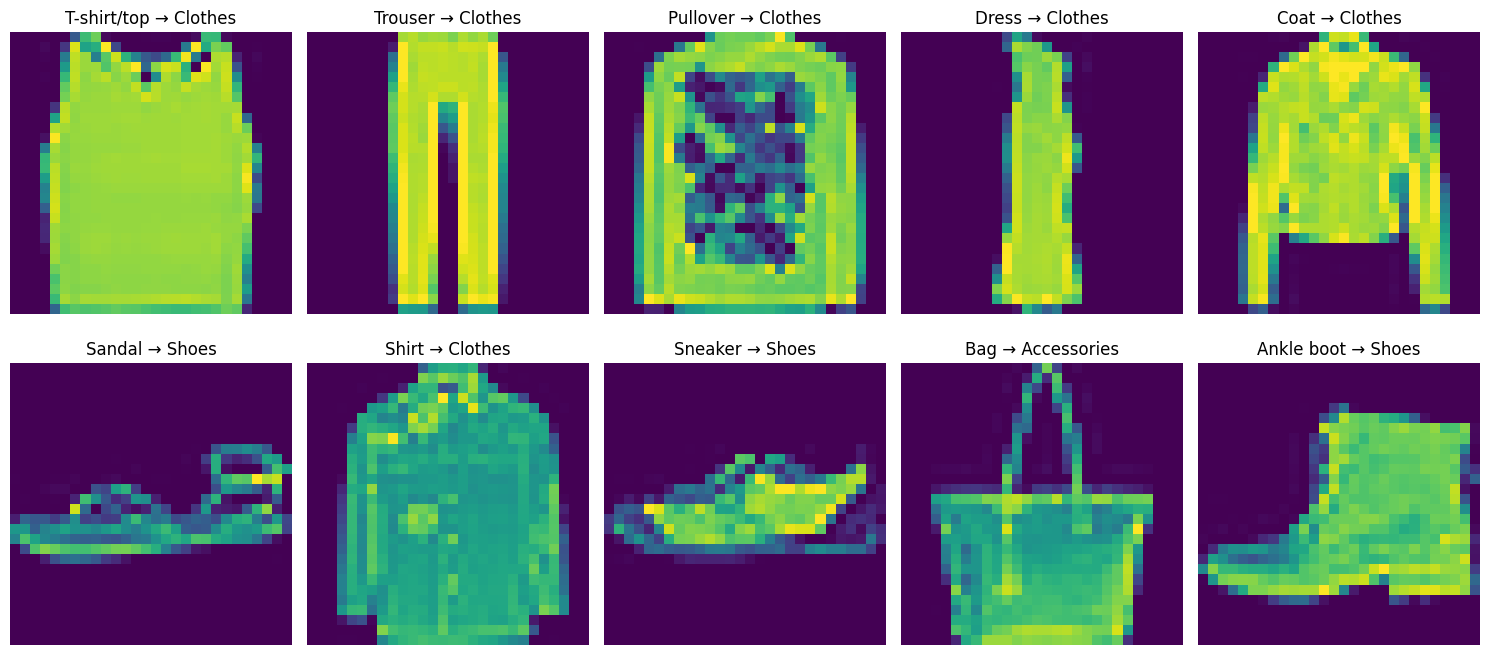

In [13]:
rows = 5
cols = 5

#print train data with removed class
plt.figure()

fig = plt.figure(figsize=(15, 15))
# k = number of items to select
sample_list = random.choices(range(0,data.simulation_labels.shape[0]), k=15)
image_count = 1
for i in sample_list:
    fig.add_subplot(rows, cols, image_count) 
    new_label = np.argmax(data.simulation_labels_super[i])
    old_label = data.simulation_labels[i]
    plt.imshow(data.simulation_images[i])
    plt.title(f"{data.original_labels_name[old_label]} → {data.new_class_names[new_label]}") 
    plt.axis('off')
    image_count += 1

plt.savefig('random_sample_drifted_test_data_refined.png')

# Print mapping of classes 

plt.figure()

rows = 2
cols = 5

fig = plt.figure(figsize=(15, 7))

for label in range(10):
    fig.add_subplot(rows, cols, label+1) 
    index = np.where(data.simulation_labels == label)[0][0]
    new_label = np.argmax(data.simulation_labels_super[index])
    plt.imshow(data.simulation_images[index])
    plt.title(f"{data.original_labels_name[label]} → {data.new_class_names[new_label]}") 
    plt.axis('off')


plt.axis('off')
fig.tight_layout()
plt.savefig('preview_dataset_mapping_refined.png')


In [14]:

print(f"Drift indices:{data.drift1}, {data.drift2}, {data.drift3}, {data.drift4}")
driftpoints = [data.drift1, data.drift2, data.drift3, data.drift4]

Drift indices:4725, 9779, 15163, 20876


In [15]:
from scipy.stats import chi2_contingency

# Calculate observed class frequencies for dataset 1 and dataset 2
class_counts_dataset1 = np.sum(data.train_labels_super, axis=0)
class_counts_dataset2 = np.sum(data.simulation_labels_super, axis=0)

print(f"Class distributions of training data where a class example has been removed {class_counts_dataset1}")
print(f"Class distributions of test data where the class example has been reintroduced  {class_counts_dataset2}")


Class distributions of training data where a class example has been removed [23517.  7845.  3918.]
Class distributions of test data where the class example has been reintroduced  [12648.  6149.  2079.]


In [16]:
import pandas as pd
df = pd.DataFrame({"original labels": data.simulation_labels, "superlabels" :np.argmax(data.simulation_labels_super, axis=1)})


In [18]:
# ensure significant difference in class distributions before and after reintruction of removed data 
# Perform Chi-squared test
chi2_stat, p_val, _, _ = chi2_contingency([class_counts_dataset1, class_counts_dataset2])

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print(f"There is a significant difference in class distributions between the datasets (reject null hypothesis) with p-value {p_val}")
else:
    print("There is no significant difference in class distributions between the datasets (fail to reject null hypothesis)")

There is a significant difference in class distributions between the datasets (reject null hypothesis) with p-value 4.368785921664583e-80


Shapes:
data_sample: (35280, 784)
class_labels: (35280,)
data_pca: (35280, 2)


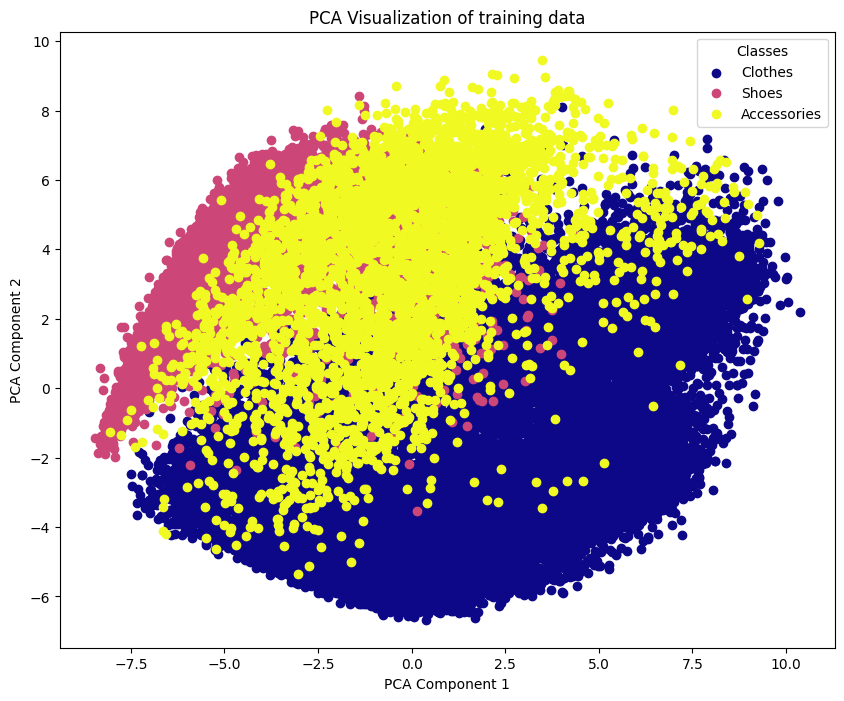

In [19]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import plotly.express as px


data_x = data.train_images
n_samples = len(data_x)
data_sample = data_x.reshape((n_samples, -1))
target = data.train_labels_super

# target is one-hot encoded, convert it to class labels
class_labels = np.argmax(target, axis=1)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_sample)

# Print out shapes and contents for debugging
print("Shapes:")
print("data_sample:", data_sample.shape)
print("class_labels:", class_labels.shape)
print("data_pca:", data_pca.shape)

df_pca = pd.DataFrame({'target': map(lambda x : str(x),class_labels), 'x': data_pca[:, 0], 'y': data_pca[:, 1]})

plt.figure(figsize=(10, 8))
# Unique categories and color map
categories = np.unique(df_pca['target'])
colors = plt.cm.plasma(np.linspace(0, 1, len(categories)))  # Generate a color map

for category, color in zip(categories, colors):
    mask = df_pca['target'] == category
    plt.scatter(df_pca['x'][mask], df_pca['y'][mask], color=color, label=data.new_class_names[int(category)])
    
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of training data')
plt.legend(title="Classes")
plt.savefig('PCA_training_refined.png')
plt.show()

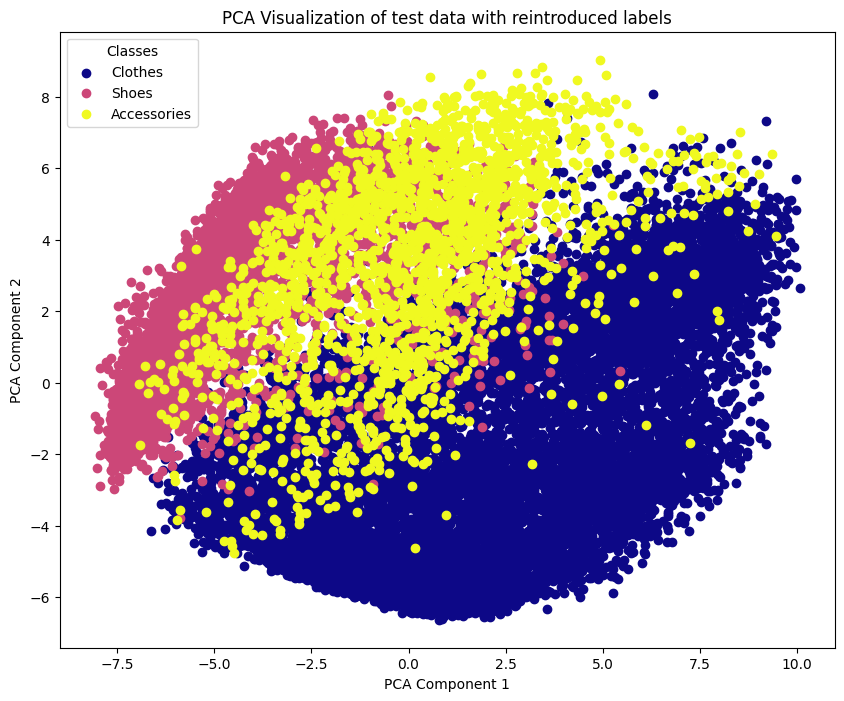

In [20]:

data_x = data.simulation_images
n_samples = len(data_x)
data_sample = data.simulation_images.reshape((n_samples, -1))
target = data.simulation_labels_super

# target is one-hot encoded, convert it to class labels
class_labels = np.argmax(target, axis=1)

pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data_sample)
df_pca_2 = pd.DataFrame({'target': map(lambda x : str(x),class_labels), 'x': data_pca_2[:, 0], 'y': data_pca_2[:, 1]})

plt.figure(figsize=(10, 8))
# Unique categories and color map
categories = np.unique(df_pca_2['target'])
colors = plt.cm.plasma(np.linspace(0, 1, len(categories)))  # Generate a color map

for category, color in zip(categories, colors):
    mask = df_pca_2['target'] == category
    plt.scatter(df_pca_2['x'][mask], df_pca_2['y'][mask], color=color, label=data.new_class_names[int(category)])
    
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of test data with reintroduced labels')
plt.legend(title="Classes")
plt.savefig('PCA_test_refined.png')
plt.show()

In [21]:
from tensorflow.keras import metrics

def build_model(hp):

    # Define CNN architecture
    model = Sequential()
    
    num_layers = 9
    num_epochs = 10
    num_batch = 64
    # Convolutional layers
    model.add(Conv2D(filters=hp.Int('units_0', min_value=32, max_value = 512, step=128), kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters=hp.Int('units_1', min_value=32, max_value = 512, step=128), kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(filters=hp.Int('units_2', min_value=32, max_value = 64, step=16), kernel_size=(3, 3), activation='relu'))
    # Flatten layer
    model.add(Flatten())
    
    # Fully connected layers
    model.add(Dense(units=hp.Int('dense', min_value=32, max_value = 64, step=16), activation='relu'))
    model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes for Fashion MNIST

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)
    
    return model



In [22]:

build_model(keras_tuner.HyperParameters())
tuner = keras_tuner.RandomSearch(build_model, objective='val_accuracy', max_trials=5,executions_per_trial=2, overwrite=True)


In [23]:

tuner.search_space_summary()



Search space summary
Default search space size: 4
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 128, 'sampling': 'linear'}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
dense (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 64, 'step': 16, 'sampling': 'linear'}


In [24]:

subset_train_x = data.train_images[:int(len(data.train_images)*0.1)]
subset_train_y =  data.train_labels_super[:int(len(data.train_images)*0.1)]
subset_val_x = data.val_images[:int(len(data.val_images)*0.1)]
subset_val_y = data.val_labels_super[:int(len(data.val_images)*0.1)]

tuner.search(subset_train_x, subset_train_y, epochs=5, validation_data=(subset_val_x, subset_val_y),)

Trial 5 Complete [00h 01m 56s]
val_accuracy: 0.9909297227859497

Best val_accuracy So Far: 0.9943310618400574
Total elapsed time: 00h 11m 31s


In [25]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 416)       4160      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 416)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 160)       599200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 160)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          92224     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [26]:
# Use the whole training and validation set to train the model with the best hyperparameters found
from tensorflow.keras.callbacks import EarlyStopping
best_hps = tuner.get_best_hyperparameters(5)
model = build_model(best_hps[0])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(data.train_images,data.train_labels_super, epochs=5, validation_data=(data.val_images,data.val_labels_super), callbacks=[early_stopping])
#history = model.fit(data.train_images,data.train_labels_super, epochs=8, validation_data=(data.val_images,data.val_labels_super))

Epoch 1/5
1103/1103 [==============================] - 185s 167ms/step - loss: 0.0533 - accuracy: 0.9833 - val_loss: 0.0276 - val_accuracy: 0.9923
Epoch 2/5
1103/1103 [==============================] - 180s 163ms/step - loss: 0.0254 - accuracy: 0.9930 - val_loss: 0.0196 - val_accuracy: 0.9952
Epoch 3/5
1103/1103 [==============================] - 172s 156ms/step - loss: 0.0191 - accuracy: 0.9949 - val_loss: 0.0293 - val_accuracy: 0.9921
Epoch 4/5
1103/1103 [==============================] - 167s 151ms/step - loss: 0.0139 - accuracy: 0.9959 - val_loss: 0.0161 - val_accuracy: 0.9950
Epoch 5/5
1103/1103 [==============================] - 169s 153ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.0161 - val_accuracy: 0.9952


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


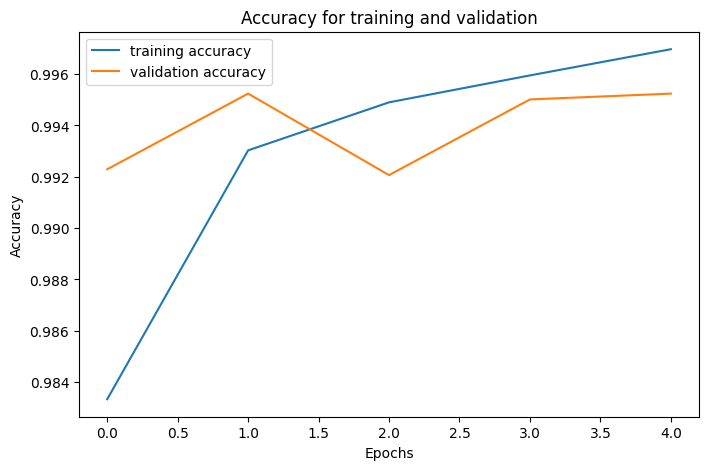

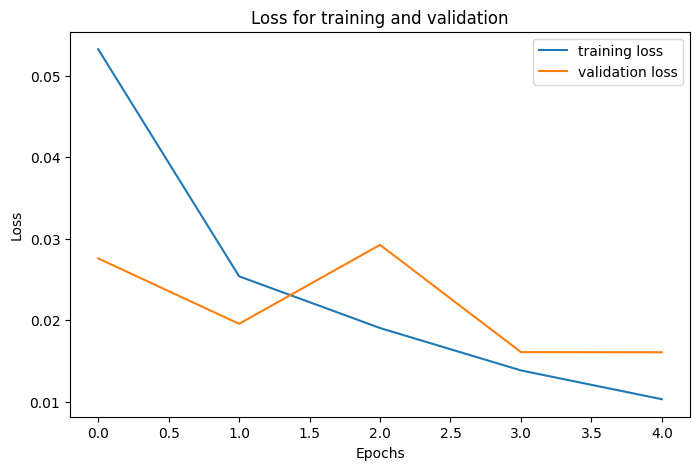

In [32]:
print(history.history.keys())
plt.figure(figsize=(8, 5))
plt.title('Accuracy for training and validation')
plt.plot(history.history['accuracy'], label="training accuracy")
plt.plot(history.history['val_accuracy'], label="validation accuracy")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig("train_accuracy_refined.png")
plt.show()

plt.figure(figsize=(8, 5))
plt.title('Loss for training and validation')
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("train_loss_refined.png")
plt.show()

In [27]:
model_evaluation = model.evaluate(data.test_images, data.test_labels_super)

138/138 [==============================] - 5s 34ms/step - loss: 0.0131 - accuracy: 0.9971


In [28]:
print(model_evaluation)

[0.013073473237454891, 0.9970521330833435]


In [29]:

y_predicted = [] # the label with highest confidence
error_list = []
confidences = [] # the highest confidence 
predictions = [] # all confidences as returned by the predict function
# predict each instance in the test datastream. Store the predicted classes, errors, confidence levels
# predict seperatly from drift detectors so we can evealuate time and computation costs for each drift detector 
for i, (X, y) in enumerate(zip(data.simulation_images, data.simulation_labels_super)):
    y_pred = model.predict(X.reshape(1, 28, 28, 1), verbose=0)
    predictions.append(y_pred)
    confidence = np.max(y_pred)
    confidences.append(confidence)
    y_pred_class = np.argmax(y_pred)
    y_predicted.append(y_pred_class)
    y_class = np.argmax(y)
    err = 1 - (y_pred_class.item() == y_class.item())
    error_list.append(err)




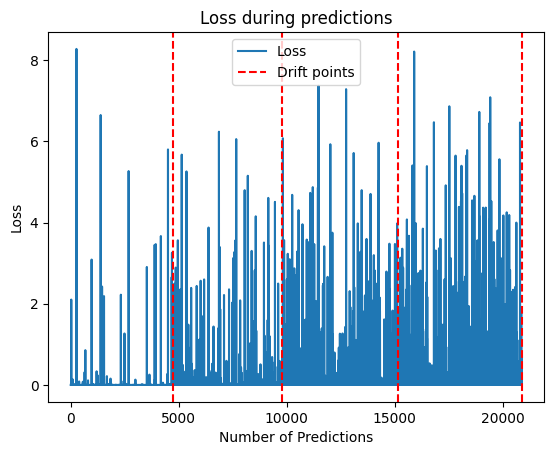

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from matplotlib.legend_handler import HandlerTuple
fig, ax = plt.subplots()
# Assuming you have predictions, errors, and confidences as lists
# Calculate the loss for each prediction
losses = []
lengths = []
for i, (pred, true_y, error, confidence) in enumerate(zip(y_predicted, data.simulation_labels_super, error_list, predictions)):
    # Convert predicted label to one-hot encoding
    pred_one_hot = np.zeros(3)  
    pred_one_hot[pred] = 1

    loss = log_loss(true_y, confidence[0])
    losses.append(loss)

# Plot loss curve
curve, = ax.plot(range(len(losses)), losses, linestyle='-')
for point in driftpoints:
     line = ax.axvline(x=point, color='r', linestyle='--')
ax.legend([curve, line], ['Loss', 'Drift points'],
               handler_map={tuple: HandlerTuple(ndivide=None)})
plt.title('Loss during predictions')
plt.xlabel('Number of Predictions')
plt.ylabel('Loss')
plt.savefig("test_loss_refined.png")
plt.show()

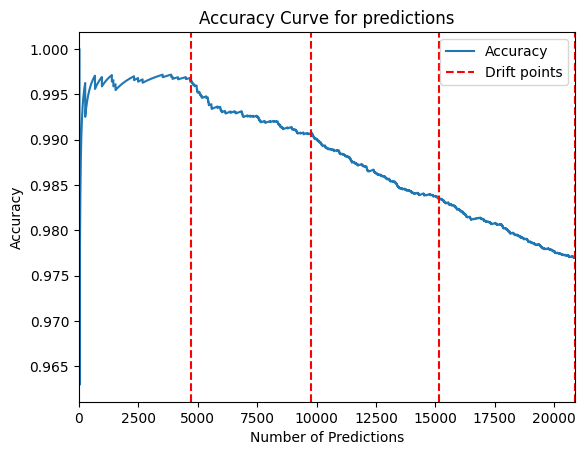

In [31]:
from matplotlib.legend_handler import HandlerTuple
# Convert errors to accuracies
accuracies = 1 - np.array(error_list)

# Calculate cumulative accuracy
cumulative_accuracy = np.cumsum(accuracies) / np.arange(1, len(accuracies) + 1)
fig, ax = plt.subplots()
# Plot accuracy curve
curve, = ax.plot(range(0, len(accuracies)), cumulative_accuracy, linestyle='-')
plt.title('Accuracy Curve for predictions')
plt.xlabel('Number of Predictions')
plt.ylabel('Accuracy')

for point in driftpoints:
     line = ax.axvline(x=point, color='r', linestyle='--')
plt.xlim(0, len(accuracies) - 1)


ax.legend([curve, line], ['Accuracy', 'Drift points'],
               handler_map={tuple: HandlerTuple(ndivide=None)})
plt.savefig("test_accuracy_refined.png")
plt.show()


In [33]:
classifications_results = pd.DataFrame([predictions, y_predicted, confidences, error_list])
classifications_results.to_csv("Classification_results.txt")

In [34]:
import time 
import psutil 
from river import drift

def adwin_drift_detection(observation_list, delta):
    time_start = time.time()
    adwin = drift.ADWIN(delta=delta)
    detected_drift = []
    
    for i, observation in enumerate(observation_list):
        adwin.update(observation)
        if adwin.drift_detected:
            detected_drift.append(i)
    
    
    time_end = time.time()
    execution_time = time_end - time_start
    ram_usage = psutil.virtual_memory().used
    # Calculate RAM hours
    ram_hours = (ram_usage / (1024 ** 3)) * (execution_time / 3600)  # Convert bytes to GB and seconds to hours
    evaluation = evaluate_drift(detected_drift, driftpoints)
    evaluation.update({"execution time": execution_time, "ram hours": ram_hours})
    adwin = None
    return evaluation

def kwsin_drift_detection(observation_list, alpha):
    time_start = time.time()
    kswin = drift.KSWIN(alpha=alpha, seed=42)
    detected_drift = []
    
    for i, observation in enumerate(observation_list):
        kswin.update(observation)
        if kswin.drift_detected:
            detected_drift.append(i)
    
    
    time_end = time.time()
    execution_time = time_end - time_start
    ram_usage = psutil.virtual_memory().used
    # Calculate RAM hours
    ram_hours = (ram_usage / (1024 ** 3)) * (execution_time / 3600)  # Convert bytes to GB and seconds to hours
    evaluation = evaluate_drift(detected_drift, driftpoints)
    evaluation.update({"execution time": execution_time, "ram hours": ram_hours})
    return evaluation

def page_hinkley(observation_list, delta):
    time_start = time.time()
    ph = drift.PageHinkley(delta=delta)
    detected_drift = []
    # test using predictions
     # Update drift detector and verify if change is detected
    for i, pred in enumerate(observation_list):
        ph.update(pred)
        if ph.drift_detected:
            detected_drift.append(i)
    
    time_end = time.time()
    execution_time = time_end - time_start
    # Get RAM usage
    ram_usage = psutil.virtual_memory().used
    # Calculate RAM hours
    ram_hours = (ram_usage / (1024 ** 3)) * (execution_time / 3600)  # Convert bytes to GB and seconds to hours
    evaluation = evaluate_drift(detected_drift, driftpoints)
    evaluation.update({"execution time": execution_time, "ram hours": ram_hours})
    return evaluation

In [35]:
from statistics import mean 

def evaluate_drift(detected_drifts, drift_times): 

    # True drift detection is the detection directly following a drift point 
    # if no drift is detected between two drift intervals then we assume a false negative reading, as a drift signal should be triggered
    true_drifts = []
    false_negatives = 0
    for i in range(len(drift_times)-1):
        nearest = min((drift for drift in detected_drifts if drift_times[i+1]> drift > drift_times[i]), default=None)
        if nearest is not None:
            true_drifts.append(nearest)
        if nearest is None: 
            false_negatives += 1

    detection_rate = len(true_drifts)/(len(drift_times)-1)
    # The false negative rate is the amount of times the detector did not trigger a signal 
    #for a drift intervall divided by the times a signal should have been triggered
    false_negative_rate = false_negatives / (len(drift_times)-1)

    # false positive drift signals are all drift signals triggered after a true drift signal in an intervall, that is all
    # drift signals not in the true signal list
    if len(detected_drifts) != 0:
        false_positives_mask = [x not in true_drifts for x in detected_drifts]
        false_positives = [x for x, m in zip(detected_drifts, false_positives_mask) if m]
        false_positives_rate = len(false_positives) / len(detected_drifts)
    else: 
        false_positives_rate = 0 # no detected drifts also mean no false positive signals 

    delays = []
    

    for detected_drift in true_drifts:
        # Compare the detected drift with the nearest real drift 
        preceding_drifts = [drift_time for drift_time in drift_times if drift_time <= detected_drift]
        if preceding_drifts:
            nearest_drift = max(preceding_drifts)
            delay = detected_drift - nearest_drift
            delays.append(delay)
    
    for i in range(len(drift_times) - 1):
    # If no true_drifts are between two consecutive drift_times
        if not any(drift for drift in true_drifts if drift_times[i] < drift < drift_times[i+1]):
            # No detections within this window, count the entire window as the delay
            delays.append(drift_times[-1])
    
    if len(delays) > 0: 
        delay_rate = mean(delays)


    result = {"true drifts": true_drifts,
                 "detection rate": detection_rate,
                 "false negative rate" : false_negative_rate,
                 "false positive rate": false_positives_rate,
                 "delay rate":  delay_rate,
                 "detections": detected_drifts}
    return result

In [36]:
drift_results = []
delta = 0.001 

for i in range(0,10):
    result = adwin_drift_detection(error_list,delta)
    result.update({"param": delta, "observation": "error rate", "method" : "adwin"})
    drift_results.append(result)
    delta += 0.001

delta = 0.001 
for i in range(0,10):
    result = adwin_drift_detection(confidences,delta)
    result.update({"param": delta, "observation": "confidence levels", "method" : "adwin"})
    drift_results.append(result)
    delta += 0.001

delta = 0.001 
for i in range(0,10):
    result = adwin_drift_detection(y_predicted,delta)
    result.update({"param": delta, "observation": "predicted labels", "method" : "adwin"})
    drift_results.append(result)
    delta += 0.001

In [37]:
delta = 0.001 
ph_evals = []
for i in range(0,10):
    result = page_hinkley(error_list,delta)
    result.update({"param": delta, "observation": "error rate", "method":"ph"})
    drift_results.append(result)
    delta += 0.001

delta = 0.001 
for i in range(0,10):
    result = page_hinkley(confidences,delta)
    result.update({"param": delta, "observation": "confidence levels", "method":"ph"})
    drift_results.append(result)
    delta += 0.001

delta = 0.001 
for i in range(0,10):
    result = page_hinkley(y_predicted,delta)
    result.update({"param": delta, "observation": "predicted labels", "method":"ph"})
    drift_results.append(result)
    delta += 0.001

In [38]:
alpha = 0.001
kwsin_evaluation = []
for i in range(0,10):
    result = kwsin_drift_detection(error_list,alpha)
    result.update({"param": alpha, "observation": "error rate","method":"kswin"})
    drift_results.append(result)
    alpha += 0.001
alpha = 0.001
for i in range(0,10):
    result = kwsin_drift_detection(confidences,alpha)
    result.update({"param": alpha, "observation": "confidence levels","method":"kswin"})
    drift_results.append(result)
    alpha += 0.001
alpha = 0.001
for i in range(0,10):
    result = kwsin_drift_detection(y_predicted,alpha)
    result.update({"param": alpha, "observation": "predicted labels","method":"kswin"})
    drift_results.append(result)
    alpha += 0.001


In [39]:
df = pd.DataFrame(drift_results)

# Print DataFrame
print(df)
df.to_csv('drift_results.csv')

             true drifts  detection rate  false negative rate  \
0                [10079]        0.333333             0.666667   
1                 [9887]        0.333333             0.666667   
2                 [9215]        0.333333             0.666667   
3                 [9215]        0.333333             0.666667   
4                 [9215]        0.333333             0.666667   
..                   ...             ...                  ...   
85         [6667, 16900]        0.666667             0.333333   
86  [6583, 11597, 15617]        1.000000             0.000000   
87  [6583, 11597, 15617]        1.000000             0.000000   
88  [6583, 11597, 15617]        1.000000             0.000000   
89  [6583, 11597, 15617]        1.000000             0.000000   

    false positive rate    delay rate  \
0              0.000000  14017.333333   
1              0.000000  13953.333333   
2              0.000000  15414.000000   
3              0.000000  15414.000000   
4             

In [40]:
print(data.simulation_labels_super.shape)
error_labels = []
errors_count = 0
for i in range(len(error_list)):
    if error_list[i] > 0:

        predicted = y_predicted[i]
        actual = np.argmax(data.simulation_labels_super[i])
        error_labels.append(actual)
        if i <10:
            print(actual)
        errors_count += 1

print(errors_count)

for digit in range(3):
    occurrences = error_labels.count(digit)
    print(f"Occurrences of digit {digit}: {occurrences}")

(20876, 3)
481
Occurrences of digit 0: 29
Occurrences of digit 1: 416
Occurrences of digit 2: 36


In [46]:
mean_metrics = df[["detection rate","false negative rate", "false positive rate", "delay rate","method","execution time","ram hours"]].groupby(["method"]).describe()
print(mean_metrics)
mean_metrics.to_csv("mean results refined.csv")

       detection rate                                                        \
                count      mean           std       min       25%       50%   
method                                                                        
adwin            30.0  0.333333  1.129203e-16  0.333333  0.333333  0.333333   
kswin            30.0  0.600000  4.497764e-01  0.000000  0.000000  0.666667   
ph               30.0  0.400000  3.545003e-01  0.000000  0.000000  0.333333   

                           false negative rate            ... execution time  \
             75%       max               count      mean  ...            75%   
method                                                    ...                  
adwin   0.333333  0.333333                30.0  0.666667  ...       0.079837   
kswin   1.000000  1.000000                30.0  0.400000  ...       5.660440   
ph      0.666667  1.000000                30.0  0.600000  ...       0.040550   

                 ram hours                  